In [78]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.unicode_minus'] = False

# interactive graph
import plotly.graph_objects as go
import cufflinks as cf 
cf.go_offline(connected=True)

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

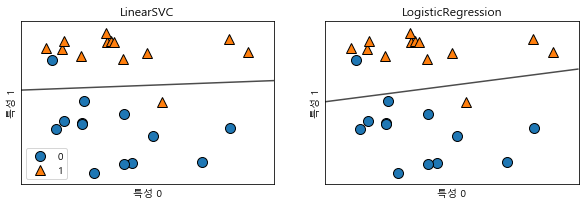

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend()

In [49]:
fig = go.Figure()
size = np.ones(len(X))

fig.add_trace(go.Scatter(x=X[:,0][y == 1], y=X[:,1][y == 1],
                    mode='markers',
                    name='alpha : 0.001'))

fig.add_trace(go.Scatter(x=X[:,0][y == 0], y=X[:,1][y == 0],
                    mode='markers',
                    name='alpha : 0.001'))

In [73]:
import plotly.express as px

size = np.ones(len(X))

fig = px.scatter(X, x=X[:,0], y=X[:,1], color=y, trendline="ols", color_continuous_scale=["red", "green"])# 'fall'
fig.update_traces(marker=dict(symbol=200,#star-triangle-up / x / diamond / triangle
                              size=12,
                              line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

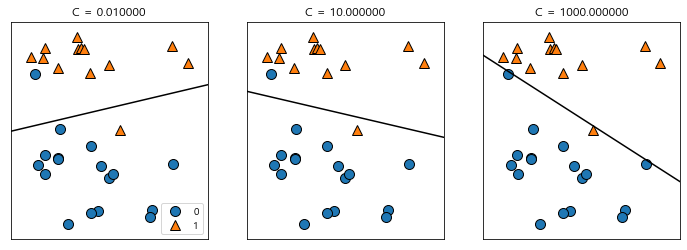

In [76]:
# C값에 따라서 LinearSVC의 결정경계가 달랴짐
# 왼쪽 : 과소적합
# 오른쪽 : 과대적합
mglearn.plots.plot_linear_svc_regularization()

In [80]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))
print()

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))
print()

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수 : 0.955
테스트 세트 점수 : 0.958

훈련 세트 점수 : 0.972
테스트 세트 점수 : 0.965

훈련 세트 점수 : 0.934
테스트 세트 점수 : 0.930


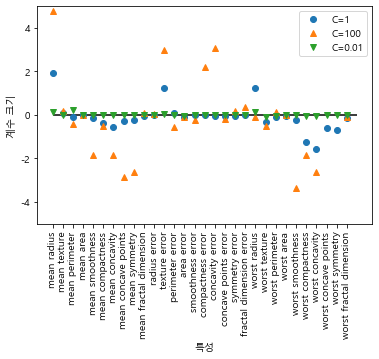

In [81]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

In [138]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=cancer.feature_names, y=logreg.coef_[0],
                    mode='markers',
                    name='C = 1'))

fig.add_trace(go.Scatter(x=cancer.feature_names, y=logreg100.coef_[0],
                    mode='markers',
                    name='C = 100'))

fig.add_trace(go.Scatter(x=cancer.feature_names, y=logreg001.coef_[0],
                    mode='markers',
                    name='C = 0.01'))

fig.update_traces(marker=dict(symbol=2,#star-triangle-up / x / diamond / triangle
                              size=8,
                              line=dict(width=1, color='DarkSlateGrey')))
# fig.layout.plot_bgcolor = '#gff'
fig.layout.plot_bgcolor = 'aliceblue'
# fig.layout.paper_bgcolor = '#fff'

fig.show()

- 규제를 강하게 할 수록 특성이 0으로 가까워진다.

C=0.001 인 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001 인 로지스틱 회귀의 테스트 정확도 : 0.92
C=1.000 인 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000 인 로지스틱 회귀의 테스트 정확도 : 0.96
C=100.000 인 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.000 인 로지스틱 회귀의 테스트 정확도 : 0.98


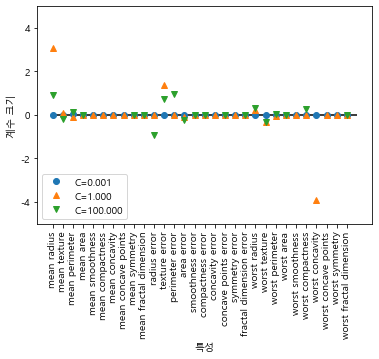

In [141]:
# L1 규제를 사용한 LogisticRegression 
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    # penalty 매개변수를 활용하여 전체 특성을 사용 할지( L2 규제 ), 일부 특성만을 사용할지 ( L1 규제 )를 사용 할지를 결정 할 수 있습니다.
    # penalty="l2" 또는 penalty="l1"
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)